Getting started using this brown dwarf metric notebook as a guide: https://github.com/yoachim/LSST-BD-Cadence/blob/main/bd_dist_metric.ipynb

In [2]:
from lsst.sims.maf.metrics.baseMetric import BaseMetric
import lsst.sims.maf.utils as mafUtils
import lsst.sims.utils as utils
from scipy import interpolate

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import astropy.units as u
from astropy.io import ascii, fits

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.maps as maps

/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:95: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName==self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName!=self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  (key is not 'bins') & (key is not 'binCol'):
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did yo

In [3]:
from mafContrib.lssmetrics import depthLimitedNumGalMetric
from mafContrib.LSSObsStrategy.galaxyCountsMetric_extended import GalaxyCountsMetric_extended \
    as GalaxyCountsMetric

In [43]:
lv_dat0 = fits.getdata('lsst_galaxies_1p25to9Mpc_table.fits')

In [44]:
lv_dat_cuts = (lv_dat['dec'] < 35.0) & (lv_dat['MStars'] > 1e7)
lv_dat = lv_dat0[lv_dat_cuts]

In [465]:
#dbFile = '/sims_maf/fbs_1.7/baseline/baseline_nexp2_v1.7_10yrs.db'
#dbFile = '/sims_maf/fbs_1.7/baseline/baseline_nexp1_v1.7_10yrs.db'
#dbFile = '/sims_maf/fbs_1.7/footprint_tune/footprint_7_v1.710yrs.db'
dbFile = '/sims_maf/fbs_1.7/rolling/rolling_scale0.8_nslice3_v1.7_10yrs.db'
runName = dbFile.replace('.db', '')
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [466]:
#nside=4096 # ~approximate resolution 0.858872 arcminutes
nside = 16 # 64
bundleList = []
#sql=''
sql = 'filter="g" or filter="i"'
#sqlconstraint = 'filter = "r" and night < 365'
sql_i = 'filter = "i"'
sql_g = 'filter = "g"'
sql_r = 'filter = "r"'
#sql = 'night < 2000 and (filter="g" or filter="i")'
#slicer = slicers.HealpixSlicer(nside=nside)
slicer = slicers.UserPointsSlicer(lv_dat['ra'], lv_dat['dec'])
#plotDict = {}
plotDict = {}

metric_ngal = GalaxyCountsMetric(nside=nside, metricName='numGal')
bundleList.append(metricBundles.MetricBundle(metric_ngal,slicer,sql_i, plotDict=plotDict,
                                             runName=runName))
#metric_ngal = depthLimitedNumGalMetric.DepthLimitedNumGalMetric(nfilters_needed=2, nside=nside, lim_ebv=0.2, metricName='numGal')
#bundleList.append(metricBundles.MetricBundle(metric_ngal,slicer,sql, plotDict=plotDict,
#                                             runName=runName))

#okr5 = (r5 < 30) & (r5 > 20)
#np.median(r5[okr5])
# 26.865

mafMap = maps.StellarDensityMap()
metric_nstar = metrics.StarDensityMetric(rmagLimit=26.865, metricName='nstars_rmag<medianM5')
bundleList.append(metricBundles.MetricBundle(metric_nstar,slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))

metric_nstar24 = metrics.StarDensityMetric(rmagLimit=24, metricName='nstars_rmag<24')
metric_nstar24p5 = metrics.StarDensityMetric(rmagLimit=24.5, metricName='nstars_rmag<24.5')
metric_nstar25 = metrics.StarDensityMetric(rmagLimit=25, metricName='nstars_rmag<25')
metric_nstar25p5 = metrics.StarDensityMetric(rmagLimit=25.5, metricName='nstars_rmag<25.5')
metric_nstar26 = metrics.StarDensityMetric(rmagLimit=26, metricName='nstars_rmag<26')
metric_nstar26p5 = metrics.StarDensityMetric(rmagLimit=26.5, metricName='nstars_rmag<26.5')
metric_nstar27 = metrics.StarDensityMetric(rmagLimit=27, metricName='nstars_rmag<27')
bundleList.append(metricBundles.MetricBundle(metric_nstar24, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
bundleList.append(metricBundles.MetricBundle(metric_nstar24p5, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
bundleList.append(metricBundles.MetricBundle(metric_nstar25, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
bundleList.append(metricBundles.MetricBundle(metric_nstar25p5, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
bundleList.append(metricBundles.MetricBundle(metric_nstar26, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
bundleList.append(metricBundles.MetricBundle(metric_nstar26p5, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
bundleList.append(metricBundles.MetricBundle(metric_nstar27, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))

metric_coadd = metrics.Coaddm5Metric()
bundleList.append(metricBundles.MetricBundle(metric_coadd, slicer, sql_i, plotDict=plotDict))
bundleList.append(metricBundles.MetricBundle(metric_coadd, slicer, sql_g, plotDict=plotDict))
bundleList.append(metricBundles.MetricBundle(metric_coadd, slicer, sql_r, plotDict=plotDict))

#metric_seeing = metrics.PercentileMetric(col='seeingFwhmGeom', percentile=33.3)
#bundleList.append(metricBundles.MetricBundle(metric_seeing, slicer, sql_i, plotDict=plotDict))

#metric_median_seeing = metrics.MedianMetric(col='seeingFwhmGeom')
#bundleList.append(metricBundles.MetricBundle(metric_median_seeing, slicer, sql_i, plotDict=plotDict))

In [467]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
#bg.plotAll(closefigs=False)

Querying database SummaryAllProps with constraint filter = "r" for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth']
Found 452240 visits
Running:  ['opsim_CoaddM5_r_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter="g" or filter="i" for columns ['fieldDec', 'fieldRA']
Found 660810 visits
Running:  ['_sims_maf_fbs_1_7_rolling_rolling_scale0_8_nslice3_v1_7_10yrs_nstars_rmagltmedianM5_g_or_i_USER']
Completed metric generation.
Running:  ['_sims_maf_fbs_1_7_rolling_rolling_scale0_8_nslice3_v1_7_10yrs_nstars_rmaglt24_g_or_i_USER']
Completed metric generation.
Running:  ['_sims_maf_fbs_1_7_rolling_rolling_scale0_8_nslice3_v1_7_10yrs_nstars_rmaglt24_5_g_or_i_USER']
Completed metric generation.
Running:  ['_sims_maf_fbs_1_7_rolling_rolling_scale0_8_nslice3_v1_7_10yrs_nstars_rmaglt25_g_or_i_USER']
Completed metric generation.
Running:  ['_sims_maf_fbs_1_7_rolling_rolling_scale0_8_nslice3_v1

In [468]:
# S/N = S/sqrt(S+N) ~ S/sqrt(N)

In [469]:
root0 = str.replace(runName, '/', '_')
root = str.replace(root0, '.', '_')

i5 = bg.bundleDict['opsim_CoaddM5_i_USER'].metricValues
g5 = bg.bundleDict['opsim_CoaddM5_g_USER'].metricValues
r5 = bg.bundleDict['opsim_CoaddM5_r_USER'].metricValues
#iband_seeing33 = bg.bundleDict['opsim_33th_ile_seeingFwhmGeom_i_USER'].metricValues
#iband_seeing = bg.bundleDict['opsim_Median_seeingFwhmGeom_i_USER'].metricValues

ngal = bg.bundleDict[root+'_numGal_i_USER'].metricValues
#ngal = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_numGal_g_or_i_USER'].metricValues
nstar = bg.bundleDict[root+'_nstars_rmagltmedianM5_g_or_i_USER'].metricValues

#ngal = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_numGal_i_USER'].metricValues
##ngal = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_numGal_g_or_i_USER'].metricValues
#nstar = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmagltmedianM5_g_or_i_USER'].metricValues

nstar_r24 = bg.bundleDict[root+'_nstars_rmaglt24_g_or_i_USER'].metricValues
nstar_r24p5 = bg.bundleDict[root+'_nstars_rmaglt24_5_g_or_i_USER'].metricValues
nstar_r25 = bg.bundleDict[root+'_nstars_rmaglt25_g_or_i_USER'].metricValues
nstar_r25p5 = bg.bundleDict[root+'_nstars_rmaglt25_5_g_or_i_USER'].metricValues
nstar_r26 = bg.bundleDict[root+'_nstars_rmaglt26_g_or_i_USER'].metricValues
nstar_r26p5 = bg.bundleDict[root+'_nstars_rmaglt26_5_g_or_i_USER'].metricValues
nstar_r27 = bg.bundleDict[root+'_nstars_rmaglt27_g_or_i_USER'].metricValues

#nstar_r24 = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt24_g_or_i_USER'].metricValues
#nstar_r24p5 = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt24_5_g_or_i_USER'].metricValues
#nstar_r25 = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt25_g_or_i_USER'].metricValues
#nstar_r25p5 = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt25_5_g_or_i_USER'].metricValues
#nstar_r26 = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt26_g_or_i_USER'].metricValues
#nstar_r26p5 = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt26_5_g_or_i_USER'].metricValues
#nstar_r27 = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt27_g_or_i_USER'].metricValues

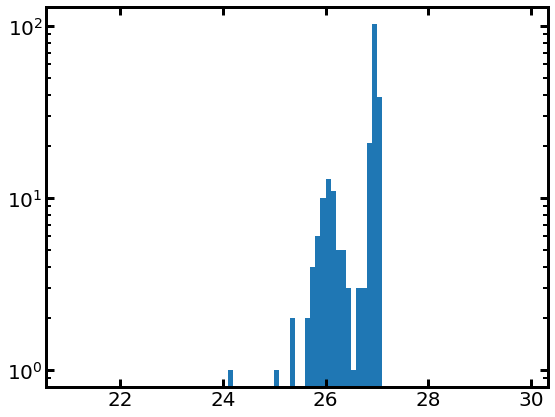

In [470]:
plt.hist(r5, bins=np.arange(21, 30, 0.1), log=True)
plt.show()

In [471]:
# Calculate the factor to go from number per healpix to number per square arcminute or per square arcsec
pixarea_deg = hp.nside2pixarea(nside, degrees=True)*(u.degree**2)
pixarea_arcmin = pixarea_deg.to(u.arcmin**2)
pixarea_arcsec = pixarea_deg.to(u.arcsec**2)

In [472]:
nstar_all = nstar*0.0
rbinvals = np.arange(24.0, 27.5, 0.5)
rbinnames = [nstar_r24, nstar_r24p5, nstar_r25, nstar_r25p5, nstar_r26, nstar_r26p5, nstar_r27]

for binval,bindensity in zip(rbinvals, rbinnames):
    inbin = np.where(np.abs(r5-binval) < 0.25)
    nstar_all[inbin] = bindensity[inbin]

outside_faint = (r5 >= 27.25)
outside_bright = (r5 <= 23.75)
nstar_all[outside_faint] = nstar[outside_faint]
nstar_all[outside_bright] = nstar_r24[outside_bright]

# Star density is number of stars per square arcsec. Convert to a total number per healpix, then number per sq. arcmin:
nstar_all_per_healpix = nstar_all*pixarea_arcsec
nstar_all_per_arcmin = nstar_all_per_healpix/pixarea_arcmin

In [473]:
# Number of galaxies is the total in each healpix. Convert to number per sq. arcmin:
ngal_per_arcmin = ngal/pixarea_arcmin

# Star density is number of stars per square arcsec. Convert to a total number per healpix, then number per sq. arcmin:
nstar_per_healpix = nstar*pixarea_arcsec
nstar_per_arcmin = nstar_per_healpix/pixarea_arcmin

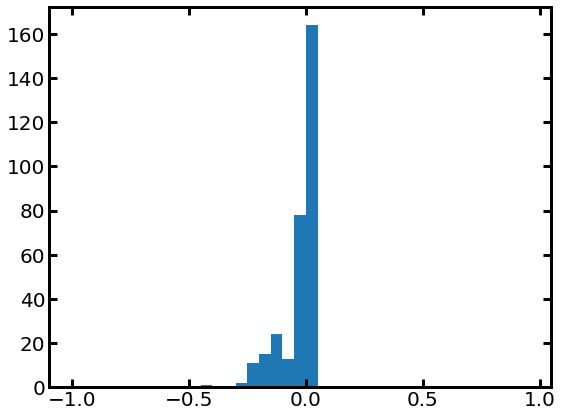

In [474]:
# Compare the fractional difference between the different densities:
plt.hist((nstar_all_per_arcmin-nstar_per_arcmin)/nstar_per_arcmin, bins=np.arange(-1, 1, 0.05))
plt.show()

In [475]:
# Account for:
#  - cmd_frac: fraction of CMD area being selected
#  - stargal_contamination: what fraction of objects in your "star" selection after star-galaxy separation are background galaxy contaminants?

cmd_frac = 0.1
stargal_contamination = 0.40
nsigma = 10.0

# Output: number of stars required to reach our requested S/N
#dum = hp.mollview(ngal_per_arcmin, title='ngxs')
#dum = hp.mollview(nstar_per_arcmin, title='nstars')
#dum = hp.mollview(nsigma*np.sqrt(ngal_per_arcmin*(cmd_frac*stargal_contamination)), title='nstars')
#dum = hp.mollview(nsigma*np.sqrt(ngal_per_arcmin*(cmd_frac*stargal_contamination)+(nstar_per_arcmin*cmd_frac)), title='nstars', max=30)

In [476]:
np.nanmean(ngal_per_arcmin)

131.91985778179335

### Next apply this to simulated dwarf galaxy stellar populations:

1. Calculate the luminosity function of a simulated dwarf _of a given luminosity_,
2. Place it at the desired distance,
3. Derive the surface brightness of this dwarf at the applied distance.

In [477]:
'''
#first: compute integrated mag in B:
LF = ascii.read('LF_-1.5_10Gyr_B.dat', header_start=12)
mags = LF['magbinc']
counts = LF['Bmag']
intBmag = -2.5*np.log10( np.sum(counts * np.power(10.0,-0.4*mags) ))
print ('intMag='+str(intBmag))
#result is 6.856379, store it for later
'''

# make fake LF for old galaxy of given integrated B, distance modulus mu, in any of filters ugrizY
def makeFakeLF(intB, mu, filtername): 
    if (filtername=='y'): filtername=='Y'
    modelBmag = 6.856379 # integrated B mag of the model LF being read
    LF = ascii.read('LF_-1.5_10Gyr.dat', header_start=12)
    mags = LF['magbinc']
    counts = LF[filtername+'mag']
    # shift model LF to requested distance and dim it
    mags = mags + mu
    modelBmag = modelBmag + mu
    # scale model counts up/down to reach the requested intB
    factor = np.power(10.0,-0.4*(intB-modelBmag))
    counts = factor * counts
    # resample from Poisson:
    return mags, counts
#    countsPoisson = np.random.poisson(counts)
#    return mags, countsPoisson
    
#test: now will make a fake LF for 47Tuc, with intB=5.78, mu0=13.32
#intB=5.78
#mu0=13.32
#LFmags,LFcounts = makeFakeLF(intB,mu0,'r')
#for i in range(len(LFmags)):
#    print (LFmags[i],LFcounts[i])


In [478]:
lf_dict_i = {}
lf_dict_g = {}
tmp_MB = -10.0

for i in range(101):
    mbkey = f'MB{tmp_MB:.2f}'
    iLFmags,iLFcounts = makeFakeLF(tmp_MB, 0.0, 'i')
    lf_dict_i[mbkey] = (np.array(iLFmags), np.array(iLFcounts))
    gLFmags,gLFcounts = makeFakeLF(tmp_MB, 0.0, 'g')
    lf_dict_g[mbkey] = (np.array(gLFmags), np.array(gLFcounts))
    tmp_MB += 0.1

<ipython-input-479-48d001991796>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(iLFmags, np.log10(iLFcounts))


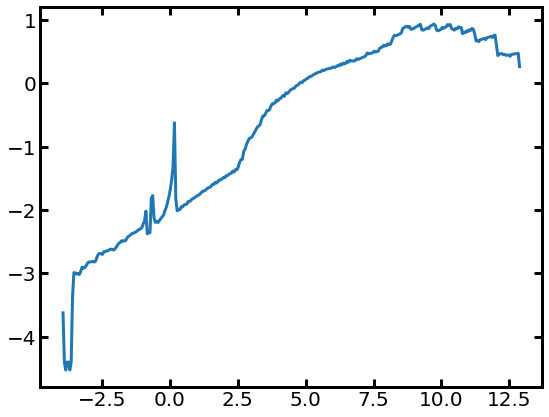

In [479]:
plt.plot(iLFmags, np.log10(iLFcounts))

In [480]:
lf_dict_i.keys()

dict_keys(['MB-10.00', 'MB-9.90', 'MB-9.80', 'MB-9.70', 'MB-9.60', 'MB-9.50', 'MB-9.40', 'MB-9.30', 'MB-9.20', 'MB-9.10', 'MB-9.00', 'MB-8.90', 'MB-8.80', 'MB-8.70', 'MB-8.60', 'MB-8.50', 'MB-8.40', 'MB-8.30', 'MB-8.20', 'MB-8.10', 'MB-8.00', 'MB-7.90', 'MB-7.80', 'MB-7.70', 'MB-7.60', 'MB-7.50', 'MB-7.40', 'MB-7.30', 'MB-7.20', 'MB-7.10', 'MB-7.00', 'MB-6.90', 'MB-6.80', 'MB-6.70', 'MB-6.60', 'MB-6.50', 'MB-6.40', 'MB-6.30', 'MB-6.20', 'MB-6.10', 'MB-6.00', 'MB-5.90', 'MB-5.80', 'MB-5.70', 'MB-5.60', 'MB-5.50', 'MB-5.40', 'MB-5.30', 'MB-5.20', 'MB-5.10', 'MB-5.00', 'MB-4.90', 'MB-4.80', 'MB-4.70', 'MB-4.60', 'MB-4.50', 'MB-4.40', 'MB-4.30', 'MB-4.20', 'MB-4.10', 'MB-4.00', 'MB-3.90', 'MB-3.80', 'MB-3.70', 'MB-3.60', 'MB-3.50', 'MB-3.40', 'MB-3.30', 'MB-3.20', 'MB-3.10', 'MB-3.00', 'MB-2.90', 'MB-2.80', 'MB-2.70', 'MB-2.60', 'MB-2.50', 'MB-2.40', 'MB-2.30', 'MB-2.20', 'MB-2.10', 'MB-2.00', 'MB-1.90', 'MB-1.80', 'MB-1.70', 'MB-1.60', 'MB-1.50', 'MB-1.40', 'MB-1.30', 'MB-1.20', 'MB-1.10'

In [481]:
def sum_luminosity(LFmags, LFcounts):
    magref = LFmags[0]
    totlum = 0.0
    
    for mag, count in zip(LFmags, LFcounts):
        tmpmags = np.repeat(mag, count)
        totlum += np.sum(10.0**((magref - tmpmags)/2.5))

    mtot = magref-2.5*np.log10(totlum)
    return mtot
    
def sblimit(mags_g, mags_i, nstars_req, distlim):
    distance_limit = distlim*1e6 # distance limit in parsecs
    distmod_limit = 5.0*np.log10(distance_limit) - 5.0

    mg_lim = []
    mi_lim = []
    sbg_lim = []
    sbi_lim = []
    flag_lim = []
    
    for glim, ilim, nstars, distmod_limit in zip(mags_g, mags_i, nstars_req, distmod_limit):
    # for i in range(len(mags_g)):
        if (glim > 15) and (ilim > 15):
            # print(glim, ilim, nstars)
            fake_MB = -10.0
            ng = 1e6
            ni = 1e6
    
            while (ng > nstars) and (ni > nstars) and fake_MB<-2.0:
                # B_fake = distmod_limit+fake_MB
                mbkey = f'MB{fake_MB:.2f}'
                iLFmags0,iLFcounts0 = lf_dict_i[mbkey]
                gLFmags0,gLFcounts0 = lf_dict_g[mbkey]
                iLFcounts = np.random.poisson(iLFcounts0)
                gLFcounts = np.random.poisson(gLFcounts0)
                iLFmags = iLFmags0+distmod_limit # Add the distance modulus to make it apparent mags
                gLFmags = gLFmags0+distmod_limit # Add the distance modulus to make it apparent mags
                # print(iLFcounts0-iLFcounts)
                gsel = (gLFmags <= glim)
                isel = (iLFmags <= ilim)
                ng = np.sum(gLFcounts[gsel])
                ni = np.sum(iLFcounts[isel])
                # print('fake_MB: ',fake_MB, ' ng: ',ng, ' ni: ', ni, ' nstars: ', nstars)
                fake_MB += 0.1
            
            if fake_MB > -9.9:
                gmag_tot = sum_luminosity(gLFmags[gsel], gLFcounts[gsel]) - distmod_limit
                imag_tot = sum_luminosity(iLFmags[isel], iLFcounts[isel]) - distmod_limit
                # S = m + 2.5logA, where in this case things are in sq. arcmin, so A = 1 arcmin^2 = 3600 arcsec^2
                sbtot_g = distmod_limit + gmag_tot + 2.5*np.log10(3600.0)
                sbtot_i = distmod_limit + imag_tot + 2.5*np.log10(3600.0)
                mg_lim.append(gmag_tot)
                mi_lim.append(imag_tot)
                sbg_lim.append(sbtot_g)
                sbi_lim.append(sbtot_i)
                if (ng < ni):
                    flag_lim.append('g')
                else:
                    flag_lim.append('i')
            else:
                mg_lim.append(999.9)
                mi_lim.append(999.9)
                sbg_lim.append(999.9)
                sbi_lim.append(999.9)
                flag_lim.append('none')
        else:
            mg_lim.append(999.9)
            mi_lim.append(999.9)
            sbg_lim.append(-999.9)
            sbi_lim.append(-999.9)
            flag_lim.append('none')
        
    return mg_lim, mi_lim, sbg_lim, sbi_lim, flag_lim

In [482]:
# Account for:
#  - cmd_frac: fraction of CMD area being selected
#  - stargal_contamination: what fraction of objects in your "star" selection after star-galaxy separation are background galaxy contaminants?

cmd_frac = 0.1
stargal_contamination = 0.40
nsigma = 10.0

nstars_required = nsigma*np.sqrt(ngal_per_arcmin*(cmd_frac*stargal_contamination)+(nstar_all_per_arcmin*cmd_frac))
#nstars_required = nsigma*np.sqrt(ngal_per_arcmin*(cmd_frac*stargal_contamination)+(nstar_per_arcmin*cmd_frac))


In [483]:
# nstars_required

In [484]:
mg_lim, mi_lim, sb_g_lim, sb_i_lim, flag_lim = sblimit(g5, i5, nstars_required, distlim=lv_dat['dist_Mpc'])

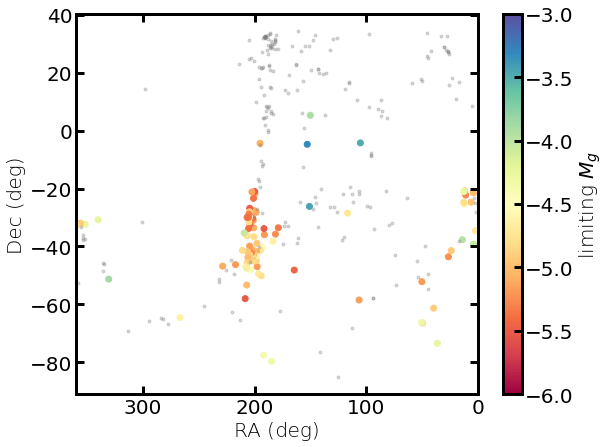

In [485]:
#plt.plot(lv_dat['dist_Mpc'], mi_lim, 'k.')
#plt.ylim(-3, -12)
#plt.plot(lv_dat['dist_Mpc'], sb_i_lim, 'k.')
#plt.ylim(25, 35)

mg_lim = np.array(mg_lim)
sb_i_lim = np.array(sb_i_lim)
okgx = (np.abs(sb_i_lim) < 90) # & (lv_dat['dec'] < 20)
plt.scatter(lv_dat[okgx]['ra'], lv_dat[okgx]['dec'], c=mg_lim[okgx], cmap='Spectral', vmax=-6, vmin=-3)
#plt.scatter(lv_dat[okgx]['ra'], lv_dat[okgx]['dec'], c=sb_i_lim[okgx], cmap='Spectral', vmax=31, vmin=28)
plt.plot(lv_dat['ra'][~okgx], lv_dat['dec'][~okgx], '.', color='Gray', alpha=0.3)
plt.colorbar(label='limiting $M_g$')
plt.xlim(360,0)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.show()

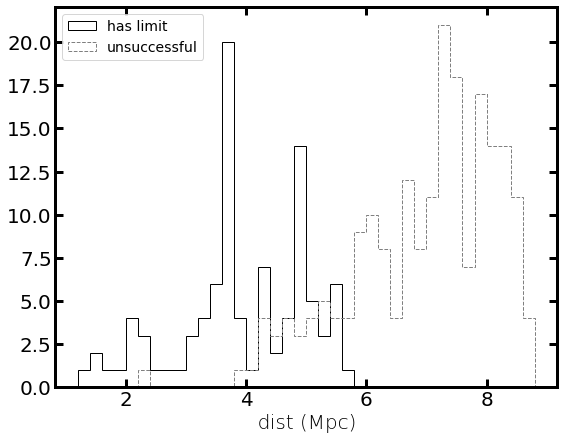

In [486]:
plt.hist(lv_dat[okgx]['dist_Mpc'], bins=np.arange(1.2, 9.0, 0.2), histtype='step', color='Black', label='has limit')
plt.hist(lv_dat[~okgx]['dist_Mpc'], bins=np.arange(1.2, 9.0, 0.2), histtype='step', color='Gray', linestyle='--', label='unsuccessful')
plt.legend(loc='upper left')
plt.xlabel('dist (Mpc)')
plt.show()

In [487]:
np.sum((lv_dat['Mstars'] > 1e8) & (lv_dat['dec'] < 20))

110

In [488]:
print(np.sum(np.array(mi_lim) < 30), np.sum(np.array(mi_lim) < 30)/len(mi_lim), np.sum(np.array(mi_lim) > 30)/len(mi_lim))

95 0.30844155844155846 0.6915584415584416


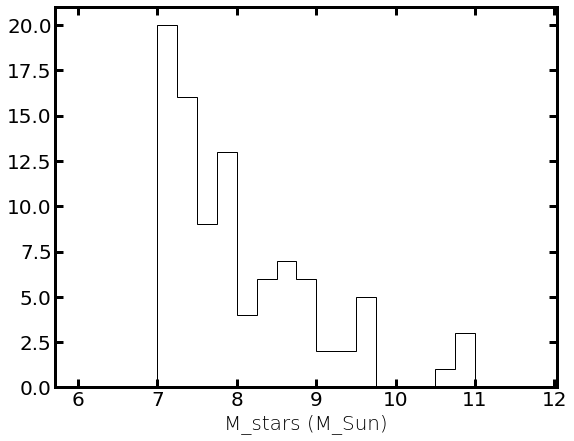

In [489]:
#plt.hist(lv_dat[okgx]['M_B'], bins=np.arange(-22.0, -2.0, 0.25), histtype='step', color='Black')
plt.hist(np.log10(lv_dat[okgx]['MStars']), bins=np.arange(6.0, 12.0, 0.25), histtype='step', color='Black')
plt.xlabel('M_stars (M_Sun)')
plt.show()

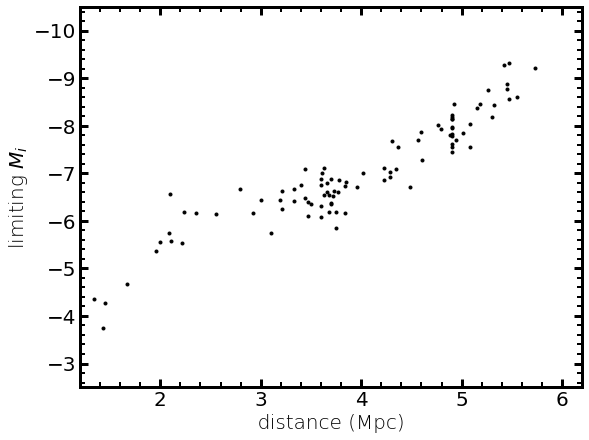

In [490]:
params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 14,
#   'xtick.labelsize': 16,
   'xtick.major.width': 3,
   'xtick.minor.width': 2,
   'xtick.major.size': 8,
   'xtick.minor.size': 5,
   'xtick.direction': 'in',
   'xtick.top': True,
   'lines.linewidth':3,
   'axes.linewidth':3,
   'axes.labelweight':3,
   'axes.titleweight':3,
   'ytick.major.width':3,
   'ytick.minor.width':2,
   'ytick.major.size': 8,
   'ytick.minor.size': 5,
   'ytick.direction': 'in',
   'ytick.right': True,
#   'ytick.labelsize': 20,
#   'text.usetex': True,
#   'text.latex.preamble': r'\boldmath',
   'figure.figsize': [9, 7],
   'figure.facecolor': 'White'
   }

plt.rcParams.update(params)

plt.plot(lv_dat['Dist_Mpc'], mi_lim, 'k.')
plt.ylim(-2.5, -10.5)
plt.xlim(1.2, 6.2)
plt.xlabel('distance (Mpc)')
plt.ylabel('limiting $M_i$')
plt.minorticks_on()
plt.show()

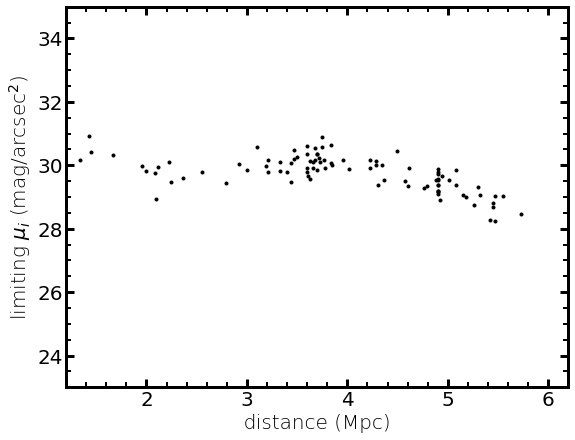

In [491]:
plt.plot(lv_dat['Dist_Mpc'], sb_i_lim, 'k.')
plt.ylim(23, 35)
plt.xlim(1.2, 6.2)
plt.xlabel('distance (Mpc)')
plt.ylabel('limiting $\mu_i$ (mag/arcsec$^2$)')
plt.minorticks_on()
plt.show()

In [492]:
# Use the conversion from Appendix A of Komiyama+2018, ApJ, 853, 29:
# V = g_hsc - 0.371*(gi_hsc)-0.068

mv = mg_lim-0.371*(mg_lim-mi_lim)-0.068
sbv = sb_g_lim-0.371*(sb_g_lim-sb_i_lim)-0.068


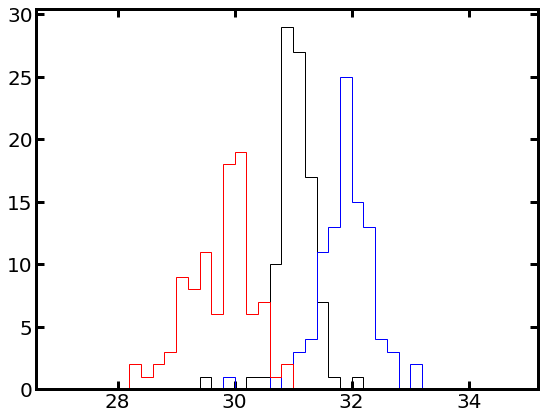

In [493]:
#plt.hist(mv, bins=np.arange(-10.3, -3.3, 0.2), histtype='step', color='Black')
#plt.hist(mg_lim, bins=np.arange(-10.3, -3.3, 0.2), histtype='step', color='Blue')
#plt.hist(mi_lim, bins=np.arange(-10.3, -3.3, 0.2), histtype='step', color='Red')
plt.hist(sbv, bins=np.arange(27, 35, 0.2), histtype='step', color='Black')
plt.hist(sb_g_lim, bins=np.arange(27, 35, 0.2), histtype='step', color='Blue')
plt.hist(sb_i_lim, bins=np.arange(27, 35, 0.2), histtype='step', color='Red')
plt.show()

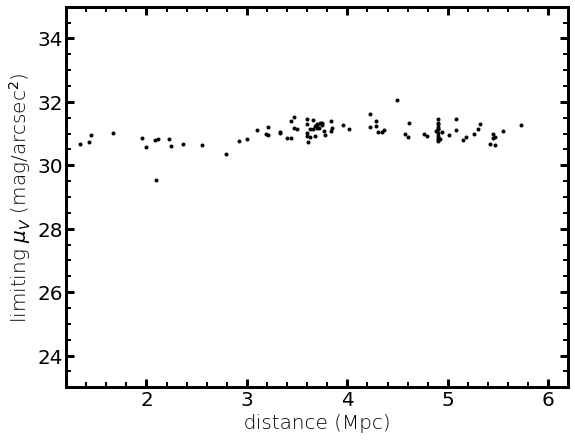

In [494]:
plt.plot(lv_dat['Dist_Mpc'], sbv, 'k.')
plt.ylim(23, 35)
plt.xlim(1.2, 6.2)
plt.xlabel('distance (Mpc)')
plt.ylabel('limiting $\mu_V$ (mag/arcsec$^2$)')
plt.minorticks_on()
plt.show()

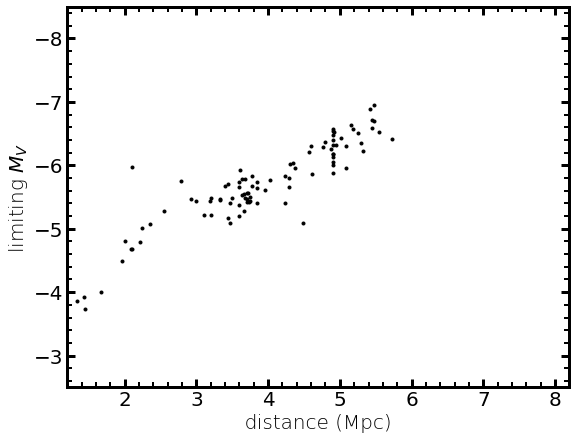

In [495]:
plt.plot(lv_dat['Dist_Mpc'], mv, 'k.')
plt.ylim(-2.5, -8.5)
plt.xlim(1.2, 8.2)
plt.xlabel('distance (Mpc)')
plt.ylabel('limiting $M_V$')
plt.minorticks_on()
plt.show()

In [496]:
print(len(lv_dat), len(lv_dat[(mv > -7) & (mv < 0)]))

308 95


In [497]:
import glob

In [498]:
glob.glob('/sims_maf/fbs_1.7/rolling/*')

['/sims_maf/fbs_1.7/rolling/rolling_scale0.2_nslice2_v1.7_10yrs.db',
 '/sims_maf/fbs_1.7/rolling/rolling_scale0.2_nslice3_v1.7_10yrs.db',
 '/sims_maf/fbs_1.7/rolling/rolling_scale0.4_nslice2_v1.7_10yrs.db',
 '/sims_maf/fbs_1.7/rolling/rolling_scale0.4_nslice3_v1.7_10yrs.db',
 '/sims_maf/fbs_1.7/rolling/rolling_scale0.6_nslice2_v1.7_10yrs.db',
 '/sims_maf/fbs_1.7/rolling/rolling_scale0.6_nslice3_v1.7_10yrs.db',
 '/sims_maf/fbs_1.7/rolling/rolling_scale0.8_nslice2_v1.7_10yrs.db',
 '/sims_maf/fbs_1.7/rolling/rolling_scale0.8_nslice3_v1.7_10yrs.db',
 '/sims_maf/fbs_1.7/rolling/rolling_scale0.9_nslice2_v1.7_10yrs.db',
 '/sims_maf/fbs_1.7/rolling/rolling_scale0.9_nslice3_v1.7_10yrs.db',
 '/sims_maf/fbs_1.7/rolling/rolling_scale1.0_nslice2_v1.7_10yrs.db',
 '/sims_maf/fbs_1.7/rolling/rolling_scale1.0_nslice3_v1.7_10yrs.db']

In [499]:
lv_dat['Dist_Mpc']

array([8.71, 3.21, 7.31, 6.64, 2.11, 4.9 , 7.5 , 4.29, 4.92, 3.72, 3.7 ,
       3.44, 3.1 , 2.09, 4.81, 8.2 , 8.91, 7.55, 4.02, 7.83, 7.87, 7.05,
       4.57, 7.45, 7.18, 5.27, 5.62, 5.01, 5.37, 4.31, 2.  , 5.08, 8.56,
       5.86, 6.03, 7.8 , 7.8 , 4.79, 8.8 , 4.31, 5.55, 6.49, 4.23, 6.5 ,
       6.19, 7.28, 5.83, 7.4 , 5.73, 6.95, 8.  , 8.  , 7.14, 6.7 , 5.15,
       6.46, 7.22, 5.5 , 8.39, 6.08, 6.  , 8.5 , 8.5 , 8.4 , 6.31, 5.13,
       7.01, 6.34, 1.67, 5.3 , 7.23, 8.4 , 7.69, 7.43, 7.2 , 4.63, 7.35,
       8.17, 7.98, 3.  , 7.87, 6.8 , 6.34, 7.4 , 6.7 , 8.27, 7.4 , 8.24,
       7.66, 8.59, 8.47, 8.83, 6.7 , 8.9 , 7.52, 4.29, 8.9 , 8.87, 8.3 ,
       8.9 , 6.15, 8.3 , 6.05, 7.11, 8.1 , 7.35, 1.43, 1.34, 7.69, 1.45,
       5.21, 6.78, 6.21, 7.9 , 7.8 , 7.98, 7.  , 8.11, 6.92, 7.73, 6.92,
       7.32, 7.02, 5.47, 8.02, 7.78, 6.64, 8.32, 8.5 , 6.7 , 5.6 , 6.  ,
       4.5 , 5.45, 6.25, 7.55, 4.88, 7.18, 7.41, 6.37, 7.43, 7.31, 7.9 ,
       3.33, 8.2 , 8.  , 8.22, 2.36, 3.96, 5.15, 7.